# PySonando

## por Danesda

Busca ser una ayuda en la enseñanza del lenguaje python2 por medio del sonido

# Acustica

Considera el sonido como una vibración que se propaga generalmente en el aire a una velocidad de 343 m/s (aproximadamente 1 km cada 3 segundos), o 1235 km/h en condiciones normales de presión y temperatura (1 atm y 20 °C).

Se considera que existe un sonido cuando la perturbacion se propaga a traves de un medio causando una variacion de la presion y desplazando las perticulas hasta que son reconocidas por algun medio (persona, instrumento etc)

## Longitud de onda: 
Distancia real que recorre una perturbación (una onda) en un determinado intervalo de tiempo  <img src="longitud.png"> 

## Frecuencia:
Mide el número de repeticiones por unidad de tiempo de un fenomeno. A mayor frecuencia menor longitud de onda y viceversa
En la acustica la frecuencia se mide en ciclos por segundo. Cuanto más frecuentes son las vibraciones (más ciclos por segundo) el oído percibe el sonido definiéndolo por tal sensación como más "agudo", y a la inversa, al ser menos frecuentes, como más "grave". El oído humano tiene un rango de percepción que va desde los 20 ciclos por segundo a los 20.000.

<img src="h.svg">  hercios (Hz)
<img src="f.svg"> con respecto a la longitud de onda

## Período de oscilación
Tiempo transcurrido entre dos puntos equivalentes de la onda
<img src="t.svg">



# LibROSA 

Es un paquete python para análisis de música y audio. Proporciona los bloques de construcción necesarios para crear sistemas de recuperación de información musical.

Para informacion consultar https://librosa.github.io/librosa/

Para instalar: conda install -c conda-forge librosa
               
               (sudo pip install librosa)

Tutorial de librosa: https://librosa.github.io/librosa/tutorial.html

Para instalar pyaudio: sudo apt-get install python-pyaudio python3-pyaudio (https://people.csail.mit.edu/hubert/pyaudio/)


# Tasa de frecuencia

La tasa o frecuencia de muestreo es el número de muestras por unidad de tiempo que se toman de una señal continua para producir una señal discreta, durante el proceso necesario para convertirla de analógica en digital.

## Señal continua: 
Para las cuales la variable independiente es contínua, es decir son señales que están definidas para un intervalo contínuo de valores de su variable independiente. <img src="continua.gif">

## Señal discreta:
Para el cual la variable independiente (tiempo) es discreta, es decir que están definidas para un conjunto de valores discretos de su variable independiente <img src="discreta.gif">



In [1]:
#Queremos saber cuantos Beat por minuto tiene esta cancion usamos la cancion Big in Japan de Alphaville
#La cancion tiene una duracion de 3:46 minutos y una frecuencia de muestreo de 44100 Hz

from __future__ import print_function
import librosa

#1. Obtener la ruta del archivo audio (debe estar guardado en la misma carpeta y ruta)
filename= 'alpha.wav' #lee el archivo de audio en .wav


# 2. Cargar el audio como una forma de onda `y`
# Almacene la tasa de muestreo como `sr`
y, sr = librosa.load(filename)

#3. Ejecutar el rastreador de ritmo predeterminado
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats por minuto'.format(tempo)) #{:.1f}nos da la exactitud del calculo entre mas elevado el numero el calculo es mas exacto

# 4. Convertir los índices de marco de eventos de golpe en timestamps (Marcas de tiempo)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


#5. Guardamos la salida en (xxx.csv) creando un archivo nuevo dentro de la carpeta
print('Guardamos la salida en japan.csv')
librosa.output.times_csv('japan.csv', beat_times)

#Los archivos CSV (del inglés comma-separated values) son un tipo de documento en formato abierto, para representar datos en forma de tabla, en las que las columnas se separan por comas (o punto y coma en donde la coma es el separador decimal: Argentina, España, Brasil...) y las filas por saltos de línea.


Estimated tempo: 99.38 beats por minuto
Guardamos la salida en japan.csv


## Seguimiento de golpes (Beat tracking)

El beat tracker devuelve una estimación del tiempo (en latidos por minuto) y los índices frame de los eventos beat.

La entrada puede ser una serie de tiempo de audio o un indice calculado por librosa.onset.onset_strength ().


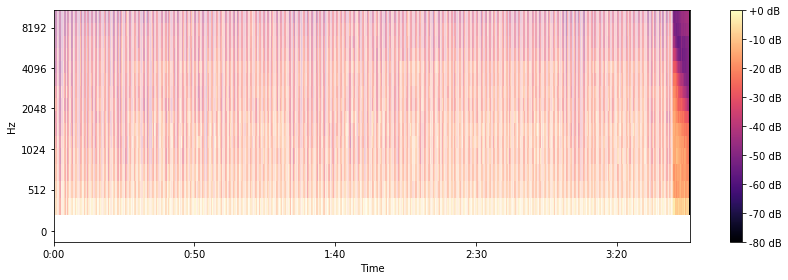

In [29]:
# Ahora, vamos a ejecutar el rastreador de ritmos.
# Utilizaremos el componente de percusión para esta parte
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Vamos a volver a dibujar el espectrograma, pero esta vez, superponer los beats detectados
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Vamos a dibujar líneas transparentes sobre los marcos de tiempo

plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

De forma predeterminada, el rastreador de ritmos recortará los golpes de salida que no parezcan lo suficientemente fuertes.

Para deshabilitar este comportamiento, llame a beat_track () con trim = False.

In [30]:
print('Tiempo estimado:        %.2f BPM' % tempo)
print('Primeros 5 tiempos de golpe:   ', beats[:5]) #segun la cantidad que queramos optener

# ¿cuándo se producen esos latidos?
print('Primeros 5 tiempos de golpe:    ', librosa.frames_to_time(beats[:5], sr=sr))



Tiempo estimado:        129.20 BPM
Primeros 5 tiempos de golpe:    [ 6 26 46 66 86]
Primeros 5 tiempos de golpe:     [ 0.13931973  0.60371882  1.06811791  1.53251701  1.9969161 ]


# Audioread 

Multi-biblioteca, decodificación de audio multiplataforma

990/5000
Se puede acceder a los búferes en el archivo iterando sobre el objeto devuelto de audio_open. Cada búfer es un búfer o un objeto str que contiene datos de PCM de números enteros firmados de little-endian de 16 bits. (Actualmente, estos parámetros de formato PCM no son configurables, pero esto podría agregarse a la mayoría de los backends.)

Los valores adicionales están disponibles como campos en el objeto de archivo de audio:

     Canales es el número de canales de audio (un número entero).
     Samplerate se da en Hz (un entero).
     Duration es la longitud del audio en segundos (un flotador).

La función audio_open selecciona de forma transparente un backend que puede leer el archivo. (Cada backend se implementa en un módulo dentro del paquete audioread.) Si no hay backends con éxito al abrir el archivo, se genera una excepción DecodeError. Esta excepción sólo se utiliza cuando el tipo de archivo no es compatible con los backends; Si el archivo no existe, se levantará un IOError estándar.

Audioread es "universal" y soporta tanto Python 2 (2.6+) como Python 3 (3.2+).

https://pypi.python.org/pypi/audioread/2.1.4

para instalacion: conda install -c conda-forge audioread=2.1.4

Librosa usa audioread para cargar archivos de audio.

Para alimentar audioread con más poder de decodificación de audio (por ejemplo, para leer archivos MP3), puede instalar ffmpeg o GStreamer.

Si está utilizando Anaconda, instale ffmpeg llamando al

Conda install -c conda-forge ffmpeg

Si no está usando Anaconda, aquí hay algunos comandos comunes para diferentes sistemas operativos:

     Linux (apt-get): apt-get instala ffmpeg o apt-get instala gstreamer1.0-plugins-base gstreamer1.0-plugins-feo
     Linux (yum): yum instalar ffmpeg o yum instalar gstreamer1.0-plugins-base gstreamer1.0-plugins-feo
     Mac: brew instalar ffmpeg o brew instalar gstreamer
     Windows: descargar binarios desde el sitio web

Para GStreamer, también es necesario instalar los enlaces de Python con:

pip install pygobject


Para cifrado en musica

http://www.elladodelmal.com/2016/05/esteganografia-con-ficheros-de-audio.html
http://www.elladodelmal.com/2016/06/tienes-un-oido-fino-cifrado-y.html

In [7]:
from __future__ import print_function

In [31]:
# Necesitaremos numpy para algunas operaciones matemáticas
import numpy as np


# Usamos matplotlib para mostrar la salida
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# Y usamos IPython.display para la salida del audio
import IPython.display


# La libreria Librosa para audio
import librosa

#Y el módulo de visualización para la visualización
import librosa.display


In [115]:


#audio_path = librosa.util.example_audio_file()

# or uncomment the line below and point it at your favorite song:
#
# audio_path = '/path/to/your/favorite/song.mp3'

#y, sr = librosa.load(audio_path)

# O descomenta la línea de abajo y apúntela en tu canción favorita:
#
# Audio_path = '/path/to/your/favorite/song.mp3

Por defecto, librosa volverá a muestrear la señal a 22050Hz.

Puede cambiar este comportamiento diciendo:

Librosa.load (audio_path, sr = 44100)

Para remuestrear a 44.1KHz, o

Librosa.load (audio_path, sr = Ninguno)

Para inhabilitar el remuestreo.

In [32]:
audio_path = 'alpha.wav'
y, sr = librosa.load(audio_path)#cargamos la cancion como sr

# Mel Espectograma 

Mostraremos cómo calcular un espectrograma Mel de una forma  de onda de audio.
Un Espectograma es  una fotografía, inscripción o diagrama de un espectro luminoso o acústico.

La Escala Mel, propuesta por Stevens, Volkman y Newmann en 1937, es una escala musical perceptual de tonos juzgados como intervalos equiespaciados por parte de observadores. <img src="mel.png">

El punto de referencia entre esta escala y la frecuencia normal se define equiparando un tono de 1000 Hz, 40 dBs por encima del umbral de audición del oyente, con un tono de 1000 mels. Por encima de 500 Hz, los intervalos de frecuencia espaciados exponencialmente son percibidos como si estuvieran espaciados linealmente. En consecuencia, cuatro octavas en la escala de hercios por encima de 500 Hz se comprimen a alrededor de dos octavas en la escala mel.

Muchos músicos y psicólogos prefieren una representación bidimensional del tono mediante el color de tono (o croma) y altura de tono, o una representación tridimensional como la estructura helical propuesta por Roger Shepard, al representar más adecuadamente otras propiedades de la audición musical.

Para convertir f  hercios en m mels se emplea: <img src="fm.svg">
Y a la inversa: <img src="m.svg">

In [2]:
# Hagamos y presentemos un espectrograma de potencia escalar (energía cuadrada)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convertir a escala de registro (dB). Utilizaremos la potencia máxima como referencia.
log_S = librosa.logamplitude(S, ref_power=np.max)#max para la potencia maxima y min para la minima

#Hacemos una nueva grafica
plt.figure(figsize=(13,4)) #Tamaño de la grafica (x,y)

# Mostrar el espectrograma en una escala de mel
# La frecuencia de muestreo y los parámetros de longitud de salto se utilizan para representar el eje de tiempo
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel') #mel en y por medio de HZ y time en x

# Poner el titulo correspondiente a la grafica
plt.title('Espectograma Mel de potencia')

# Dibujar una barra de color
plt.colorbar(format='%+02.0f dB') #cantidad de cifras 

# Crear la grafica
plt.tight_layout()


NameError: name 'np' is not defined

# Separación de fuentes de percusión armónica

Para hacer cualquier análisis de señal, debemos separar los componentes armónicos y de percusión del audio por medio del modulo de efectos.

## Armonicos
Son los componentes de un sonido que se definen como las frecuencias secundarias que acompañan a una frecuencia fundamental o generadora.

Los sonidos armónicos son producidos por la naturaleza, al recibir cuerpos capaces de vibrar las ondas sonoras que emite un sonido fundamental al espacio y se han utilizado como base de los sistemas de temperamento justo.

El armónico de una onda es un componente sinusoidal(la curva que representa gráficamente la función seno) de una señal. Su frecuencia es un múltiplo de la fundamental.

Los armónicos son a su vez, los que generan el timbre característico de una fuente de sonido (ya sea una voz humana, un instrumento musical, etc.). Son los que permiten diferenciar un tipo de instrumento de otro, o reconocer el timbre de la voz de una persona.

Los armónicos más altos son inaudibles(La amplitud de los armónicos más altos es mucho menor que la amplitud de la onda fundamental y tiende a cero), y lo que da diferentes timbres a diferentes instrumentos es la amplitud y la ubicación de los primeros armónicos y los parciales. Y las diferentes trayectorias de las ondas sonoras de dos instrumentos tocando al unísono es lo que permite al oyente percibirlos como dos instrumentos separados.

Cuando se ejecuta una nota en un instrumento musical se genera una onda de presión de aire. Esta onda sonora está acompañada por una serie de armónicos, todos prácticamente inaudibles, pero que le dan al instrumento su timbre particular. Cada armónico de esta serie tiene una amplitud (volumen o fuerza del sonido) diferente. 

A partir del quinto armónico, todos los siguientes armónicos impares suenan ligeramente desafinados con respecto al temperamento igual.

Los armónicos cuyas frecuencias no son múltiplos enteros se denominan "parciales". Las campanas son los que poseen más parciales perceptibles que otros instrumentos

In [34]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

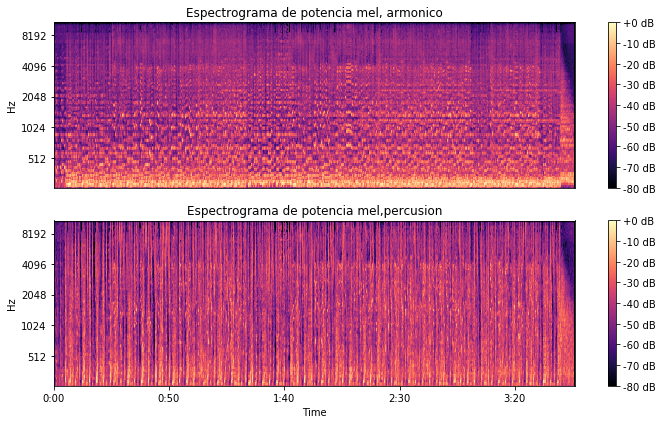

In [35]:
# Hagamos y presentemos un espectrograma de potencia escalar (energía cuadrada)
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convertir a escala de registro (dB). Utilizaremos la potencia máxima como referencia.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

#Hacer un nuevo grafico
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)


# Mostrar el espectrograma en una escala de mel
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

#Ponemos un titulo descripctivo de la grafica
plt.title('Espectrograma de potencia mel, armonico')

#Dibujar la barra de color
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

#Ponemos un titulo descripctivo de la grafica
plt.title('Espectrograma de potencia mel,percusion')

#Dibujar la barra de color
plt.colorbar(format='%+02.0f dB')

# Crear la grafica
plt.tight_layout()

# CLASE DE TONO

Conjunto de todos los tonos que son un número entero de octavas aparte, por ejemplo, la clase de tono C consiste en el Cs en todas las octavas. 

    {Cn: n es un entero} = {..., C-2, C-1, C0, C1, C2, C3 ...};

Aunque no hay límite superior o inferior formal a esta secuencia, sólo un número limitado de estos tonos son audibles para el oído humano. La clase de tono es importante porque la percepción de tono humano es periódica: los tono pertenecientes a la misma clase de tono son percibidos como de calidad o color similar, una propiedad llamada "equivalencia de octava".

Un croma es un atributo de los tonos (en contraposición a la altura del tono), al igual que el tonalidad es un atributo de color. Una clase de tono es un conjunto de todos los tonos que comparten el mismo croma, al igual que "el conjunto de todas las cosas blancas" es la colección de todos los objetos blancos.

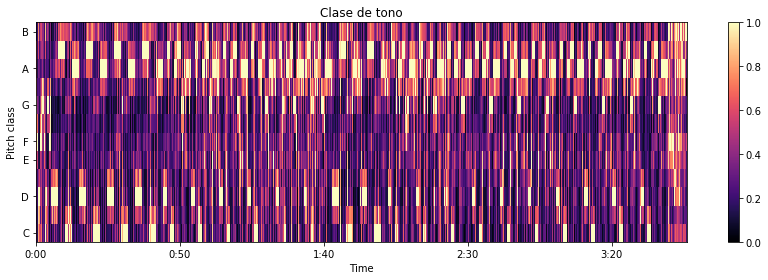

In [36]:
# Utilizaremos un cromagograma basado en CQT aquí. Una implementación basada en STFT también existe en chroma_cqt ()
# Usaremos el componente armónico para evitar la contaminación por transitorios

C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

#Creamos una nueva figura
plt.figure(figsize=(12,4))

# Mostrar el cromagram: la energía en cada clase cromática del tono en función del tiempo
# Para asegurarse de que los colores abarcan toda la gama de valores de croma, configure vmin y vmax (valor maximo y minimo)
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Clase de tono')
plt.colorbar()

plt.tight_layout()

# Coeficientes de ceptstral de la frecuencia mel

Coeﬁcientes para la representación del habla basados en la percepción auditiva humana. Estos surgen de la necesidad, en el área del reconocimiento de audio automático, de extraer características de las componentes de una señal de audio que sean adecuadas para la identificación de contenido relevante, así como obviar todas aquellas que posean información poco valiosa como el ruido de fondo, emociones, volumen, tono, etc. y que no aportan nada al proceso de reconocimiento, al contrario lo empobrecen.

Se utilizan comunmente para representar la textura o el timbre del sonido.

En el procesamiento de sonido, el cepstrum de frecuencia de mel (MFC) es una representación del espectro de potencia a corto plazo de un sonido, basado en una transformada de coseno lineal de un espectro de potencia logarítmica en una escala de frecuencia de mel no lineal.

Los coeficientes cepstrales de Mel-frequency (MFCCs) son coeficientes que forman colectivamente un MFC. Se derivan de un tipo de representación cepstral del clip de audio (un "espectro-de-un-espectro" no lineal). La diferencia entre el cepstrum y el cepstrum de mel-frequency es que en el MFC, las bandas de frecuencia están igualmente espaciadas en la escala de mel, que se aproxima a la respuesta del sistema auditivo humano más estrechamente que las bandas de frecuencia linealmente espaciadas utilizadas en el cepstrum normal. Esta deformación de frecuencia puede permitir una mejor representación del sonido, por ejemplo, en la compresión de audio.


MFCCs se calculan comúnmente de la siguiente forma:

    Separar la señal en pequeños tramos.
    A cada tramo aplicarle la Transformada de Fourier discreta y obtener la potencia espectral de la señal.
    Aplicar el banco de filtros correspondientes a la Escala Mel al espectro obtenido en el paso anterior y sumar las energías en cada uno de ellos.
    Tomar el logaritmo de todas las energías de cada frecuencia mel
    Aplicarle la transformada de coseno discreta a estos logaritmos.

Estos valores obtenidos son los coeficientes que buscamos. Aunque opcionalmente se le pueden añadir otros valores como los deltas y/o los delta-deltas.


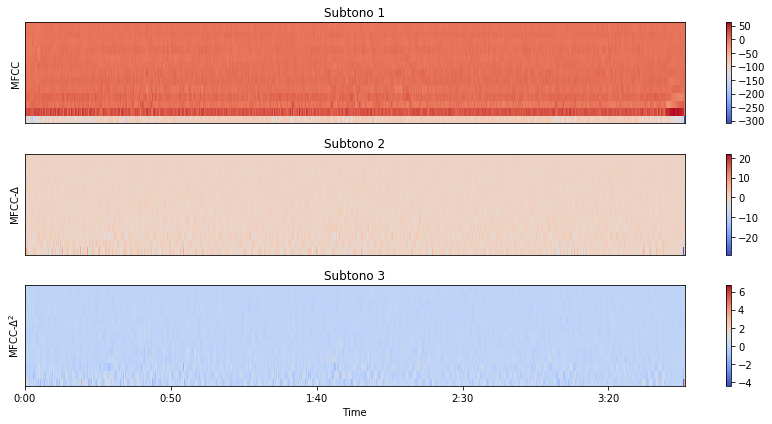

In [37]:
# A continuación, extraeremos los 13 principales coeficientes cepstrales Mel-frequency (MFCCs)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

#Mostramos cada uno en su propia subtrama
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.title('Subtono 1')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.title('Subtono 2')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.title('Subtono 3')
plt.colorbar()

plt.tight_layout()

#Para poder usarlo lo apilamos en una matriz
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# Agregación de funciones síncrono-beat

Una vez que hayamos localizado los eventos de beat, podemos usarlos para resumir el contenido de la característica de cada beat.

Esto puede ser útil para reducir la dimensionalidad de los datos y eliminar el ruido transitorio de las características.

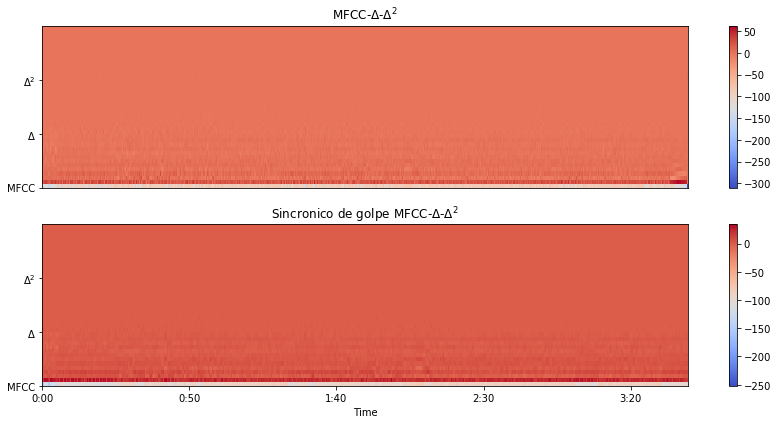

In [38]:
# feature.sync resumirá cada evento de compás con el vector de característica media dentro de ese latido
M_sync = librosa.util.sync(M, beats)

plt.figure(figsize=(12,6))

# Trazar las características originales y beat-síncronas entre sí
plt.subplot(2,1,1)
librosa.display.specshow(M)
plt.title('MFCC-$\Delta$-$\Delta^2$')

# También podemos usar pyplot * ticks directamente
# Vamos a marcar el MFCC y las características delta


plt.yticks(np.arange(0, M.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])

plt.colorbar()

plt.subplot(2,1,2)
# Librosa puede generar ticks de eje de timestamps arbitrarios y eventos beat también
librosa.display.specshow(M_sync, x_axis='time',
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))

plt.yticks(np.arange(0, M_sync.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])             
plt.title('Sincronico de golpe MFCC-$\Delta$-$\Delta^2$')
plt.colorbar()

plt.tight_layout()



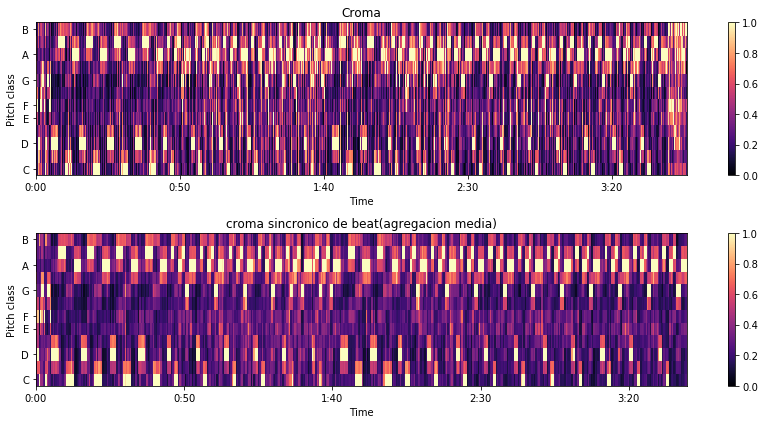

In [39]:
# En lugar de calcular el delta-MFCC medio dentro de cada latido, vamos a hacer beat-chroma sincrónica
# Podemos reemplazar la media con cualquier función de agregación estadística, como min, max o mediana.

C_sync = librosa.util.sync(C, beats, aggregate=np.median)
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

plt.title('Croma')
plt.colorbar()

plt.subplot(2, 1, 2)
librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))


plt.title('croma sincronico de beat(agregacion media)')

plt.colorbar()
plt.tight_layout()



# PyAudio

lo primero que tenemos que hacer es instalar la libreria pyaudio, puede ser por medio de python -m pip install pyaudio
Pygame dispone del módulo pygame.mixer para manipular sonidos.
dichos sonidos tienen que estar en el formato wav o ogg
si tenemos archivos mp3 podemos convertirlos al formato que necesitamos usando por ejemplo
http://www.online-convert.com
Instalamos sudo apt-get install python-pygame

In [2]:
"""PyAudio Example: Play a wave file."""

import pyaudio
import wave
import sys

CHUNK = 1024

if len(sys.argv) < 2:
    print("Plays a wave file.\n\nUsage: %s filename.wav" % sys.argv[0])
    sys.exit(-1)

wf = wave.open(sys.argv[1], 'rb')

# instantiate PyAudio (1)
p = pyaudio.PyAudio()

# open stream (2)
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

# read data
data = wf.readframes(CHUNK)

# play stream (3)
while len(data) > 0:
    stream.write(data)
    data = wf.readframes(CHUNK)

# stop stream (4)
stream.stop_stream()
stream.close()

# close PyAudio (5)
p.terminate()

ImportError: No module named pyaudio

# PyGame

In [1]:
#PyGame
import pygame

import sys

from pygame.locals import *

def main():

    pygame.init()

    Reloj= pygame.time.Clock()

    Ventana = pygame.display.set_mode((600, 400))
    pygame.display.set_caption("Monigotillo animado")

    Fondo = pygame.image.load("fondo.jpg")

    Imagen = pygame.image.load("monigotillo.png")
    transparente = Imagen.get_at((0, 0))
    Imagen.set_colorkey(transparente)

    # Ruidito es un objeto Sound creado a partir del archivo *.wav
    Ruidito = pygame.mixer.Sound("alpaville.wav")

    # Musica es otro objeto Sound creado a partir del archivo *.wav
    Musica = pygame.mixer.Sound("bowie.wav")

    coordenadas_monigotillo= (300, 200)

    MiMonigotillo = Monigotillo(coordenadas_monigotillo, Imagen)

    # Bajamos el volumen de la música (sí, se puede hacer antes o durante la reproducción)
    Musica.set_volume(0.5)

    # Reproducimos nuestro sample de música en un bucle infinito (-1)
    Musica.play(-1)

    while True:

        MiMonigotillo.update(coordenadas_monigotillo)

        Ventana.blit(Fondo, (0, 0))
        Ventana.blit(MiMonigotillo.image, MiMonigotillo.rect)

        pygame.display.flip()

        for evento in pygame.event.get():
            if evento.type == pygame.KEYDOWN:
                if evento.key == pygame.K_ESCAPE:
                    sys.exit()

            # Si el evento es una pulsación de ratón...
            elif evento.type == MOUSEBUTTONDOWN:

                # ...actualizamos las coordenadas de monigotillo con las del puntero...
                coordenadas_monigotillo = pygame.mouse.get_pos()

                # ...y reproducimos el sonido.
                Ruidito.play(0)
        Reloj.tick(30)


class Monigotillo(pygame.sprite.Sprite):

    def __init__(self, coordenadas, imagen):
        pygame.sprite.Sprite.__init__(self)

        self.ImgCompleta = imagen
        a=0
        self.arrayAnim=[]
        while a < 6:
            self.arrayAnim.append(self.ImgCompleta.subsurface((a*32,100,32,64)))
            a= a + 1
        self.anim= 0

        self.actualizado = pygame.time.get_ticks()
        self.image = self.arrayAnim[self.anim]
        self.rect = self.image.get_rect()
        self.rect.center = coordenadas


    def update(self, nuevas_coordenadas):
        self.rect.center = nuevas_coordenadas
        if self.actualizado + 100 < pygame.time.get_ticks():
            self.anim= self.anim + 1
            if self.anim > 5:
                self.anim= 0
            self.image = self.arrayAnim[self.anim]
            self.actualizado= pygame.time.get_ticks()


main()

ImportError: No module named pygame

# PYO 
Pyo es un módulo de Python escrito en C para ayudar a la creación de secuencias de comandos DSP. Pyo contiene clases para una amplia variedad de procesamiento de señales de audio. Con pyo, el usuario podrá incluir cadenas de procesamiento de señales directamente en scripts o proyectos Python, y manipularlos en tiempo real a través del intérprete. Las herramientas del módulo pyo ofrecen primitivas, como operaciones matemáticas en señales de audio, procesamiento básico de señales (filtros, retardos, generadores de síntesis, etc.), pero también algoritmos complejos para crear granulación de sonido y otras manipulaciones de audio creativas. Pyo soporta el protocolo OSC (Open Sound Control) para facilitar las comunicaciones entre los softwares, y el protocolo MIDI para generar eventos de sonido y controlar los parámetros del proceso. Pyo permite la creación de sofisticadas cadenas de procesamiento de señales con todos los beneficios de un lenguaje de programación general maduro y ampliamente utilizado.

Lo primero que debemos hacer es descargar el programa E-pyo de su pagina oficial segun corresponda a nuestro sistema operativo y version de python  http://ajaxsoundstudio.com/software/pyo/

In [ ]:
 from time import sleep
    from pyo import *
    server = Server().boot()
    server.start()
    sine = Sine(261.63, mul=0.1).out()
    sleep(3)
    server.stop()

In [ ]:
from time import sleep
    from pyo import *
    server = Server().boot()
    server.start()
    sine = Sine(261.63, mul=0.1).out()
    sleep(3)
    server.stop()
    
    #http://www.pygame.org/download.shtml
    #http://pythonistasforever.blogspot.com.co/2015/12/como-descargar-e-instalar-pygame-en.html
    #https://pypi.python.org/pypi/PyAudio
    #https://people.csail.mit.edu/hubert/pyaudio/docs/
    #https://www.u-cursos.cl/ingenieria/2012/1/CC3501/2/material_docente/previsualizar?id_material=415947
    #http://recursospython.com/guias-y-manuales/pyo-procesamiento-generacion-audio/